# Monte Carlo - Bootstrapping Part 2

Name: Carlos Cocha

In [1]:
import statistics
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

###  Read (or code directly) your 𝑥𝑖 ± 𝜎𝑥𝑖, 𝑦𝑖 ± 𝜎𝑦𝑖

In [2]:
# Reading the data from a .csv file
data = pd.read_csv("DATA.csv")
headers = ['x','y','sigma_x','sigma_y']
dframe = pd.DataFrame(data.values, columns = headers)
dframe

,x,y,sigma_x,sigma_y
0,0.50,2.40,0.02,0.6
1,0.90,3.10,0.09,1.8
2,1.50,4.70,0.15,1.5
3,1.80,4.90,0.18,0.6
4,2.65,6.30,0.45,3.0
5,3.00,8.05,0.05,0.2
6,3.45,8.80,0.07,0.4
7,4.10,11.50,0.25,3.2
8,4.65,11.20,0.15,0.8
9,5.25,14.30,0.25,2.4


In [3]:
# Copying the data into variables 
x = dframe['x']
y = dframe['y']
sx = dframe['sigma_x']
sy = dframe['sigma_y']

# Promoting this exercise into a course project

Define your fitting function as y=y_0+m(x-x_w)

In [4]:
def weighted_av(x, sigma):
    '''
    Function to calculate the weighted average of a set x.
    
    Parameters:
    x     :: set of data
    sigma :: uncertainty/sigma of the data
    
    Example:
    weighted_av([2,5,4,5,7], [0.5,0.2,0.4,0.5,0.3])
    - 5.07887
    '''
    n, d  = 0, 0
    for i in range(len(x)):
        n += x[i]/(sigma[i]*sigma[i])
        d += 1/(sigma[i]**2)
    x_w = n/d
    return x_w

In [5]:
sx**2

0    0.0004
1    0.0081
2    0.0225
3    0.0324
4    0.2025
5    0.0025
6    0.0049
7    0.0625
8    0.0225
9    0.0625
Name: sigma_x, dtype: float64

In [6]:
weighted_av(x, sx)

1.1100806670156838

In [7]:
def slope_inter(x, y):
    '''
    Function to calculate the intercept (a) and the slope (b) parameters of
    y = a + b*x given the 2 sets of data (x, y)    .
    
    Parameter:
    x :: set of data x 
    y :: set of data y
    
    Example:
    slope_inter([0.5 , 0.9 , 1.5 , 1.8 , 2.65], [2.4 , 3.1 , 4.7 , 4.9 , 6.3])
    (1.5731 , 1.8414)
    '''
    x_m = np.mean(x)
    y_m = np.mean(y)
    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x[i]-x_m)*(y[i]-y_m)
        denominator += (x[i]-x_m)**2
    b = numerator/denominator
    a = y_m - b*x_m
    return a , b

In [8]:
def slope_inter2(x,sx, y, sy):
    '''
    Function to calculate the intercept (y0) and the slope (m) parameters of
    y = y0 + m*(x-x^) given the 2 sets of data (x, y)    .
    
    Parameter:
    x :: set of data x 
    y :: set of data y
    
    Example:
    slope_inter2([0.5 , 0.9 , 1.5 , 1.8 , 2.65], [2.4 , 3.1 , 4.7 , 4.9 , 6.3])
    (4.279999999999999, 1.8414017341040463)
    '''
    x_m = np.mean(x)
    y_m = np.mean(y)
    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x[i]-x_m)*(y[i]-y_m)
        denominator += (x[i]-x_m)**2
    m = numerator/denominator
    #y0 = y_m 
    y0 = weighted_av(y, sx)
    return y0 , m

In [9]:
def cov(array1, array2):
    '''
    Function to calculate de covariance of 2 datasets.
    
    Parameters:
    array1 :: set of data1
    array2 :: set of data2
    
    Example:
    cov([1, 2, 4, 6, 3], [3, 5, 3, 2, 7])
    -1.5    
    '''
    n = 0
    M = len(array1)
    a1_m = np.array(array1).mean()
    a2_m = np.array(array2).mean()
    for i in range(M):
        n += (array1[i] - a1_m)*(array2[i] - a2_m)
    covariance = n/(M-1)
    return covariance

In [10]:
def stand_d(x):
    '''
    Function to calculate the standard deviation of a set x.
    
    Parameters:
    x :: set of data
    
    Example:
    stand_d([2,5,2,4,5,7,3])
    - 1.82574
    '''
    x_m = np.mean(x)
    n = 0
    for i in range(len(x)):
        n += (x[i] - x_m)**2
    sd = np.sqrt(n/(len(x) - 1))
    return sd

### 2. Repeat the bootstrapping approach to obtain 𝑦0𝑘,𝑚𝑘𝑘=1𝑀. Produce all the exercise output for this case (including optional ones)

#### For each “ k th ” sample, must calculate y0_k, m_k:

In [11]:
M = 10000
resampling = [] # to save all the resampling data
for i in range(M):
    x_d , y_d = [] , []
    for j in range(len(x)):
        # random.randn produce random numbers with Gaussian distribution
        x_d.append(x[j] + sx[j]*np.random.randn())
        y_d.append(y[j] + sy[j]*np.random.randn())
    resampling.append([x_d, y_d])

In [12]:
y0_m_dat = np.zeros((M, 2))
for i in range(M):
    # Calculate the slope and interception of each resampling dataset.
    y0_m_dat[i][0], y0_m_dat[i][1] = slope_inter2(resampling[i][0], sx, resampling[i][1], sy)

#### Calculating the cov (m,y0)

In [13]:
cov_m_y0 = cov(y0_m_dat[:, 0], y0_m_dat[:, 1])
print("The covariance between m and y0 is:", str(round(cov_m_y0,2)))

The covariance between m and y0 is: -0.03


In this case the covariance between the slope and the intercept is still negative but it reduces a quantity equal aproximately to the half.

In [14]:
y0 = y0_m_dat[:, 0].mean()
m = y0_m_dat[:, 1].mean()
sd_y0 = stand_d(y0_m_dat[:, 0])
sd_m = stand_d(y0_m_dat[:, 1])
print('The results using Bootstrapping method are:')
print('y0 ± 𝜎y0 = ' + str(round(y0, 3)) +  " ± " + str(round(sd_y0, 3)))
print('m ± 𝜎m = ' + str(round(m, 3)) +  " ± " + str(round(sd_m, 3)))

The results using Bootstrapping method are:
y0 ± 𝜎y0 = 3.758 ± 0.452
m ± 𝜎m = 2.389 ± 0.375


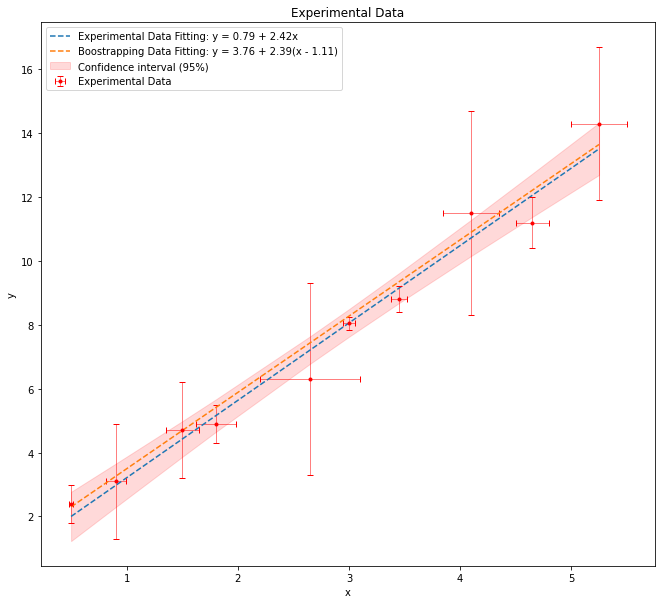

In [15]:
# Create a plot environment
fig, ax = plt.subplots(figsize = (11, 10))
# Experimental data fitting plot
a_d , b_d = slope_inter(x, y)
yfit = a_d + b_d*np.array(x)
plt.plot(x, yfit, "--", label = "Experimental Data Fitting: y = "+str(round(a_d, 2))+' + '+str(round(b_d, 2))+'x')
plt.errorbar(x,y, xerr = sx, yerr = sy, fmt = 'ro', markersize = 3, 
             ecolor = 'red', capsize = 3,  linewidth = 0.5, 
             color = 'darkblue', label = "Experimental Data")
# Boostrapping data fitting plot
plt.plot(x, y0 + m*np.array(x-weighted_av(x, sx)), "--", label = "Boostrapping Data Fitting: y = "+str(round(y0, 2))+' + '+str(round(m, 2))+'(x - '+str(round(weighted_av(x,sx),2))+')')
# Confidence interval plot
resid = y - yfit
s_err = np.sqrt(np.sum(resid**2)/(len(resid) - 1))    
t = stats.t.ppf(0.975, len(x)-1) # t = 0.975 for 95 % of confidence
ci = t * s_err * np.sqrt(1/len(x) + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2))    
plt.fill_between(x, yfit + ci, yfit - ci, color=[1, 0, 0, 0.15], label = "Confidence interval (95%)") 

plt.xlabel('x')
plt.ylabel('y')
plt.title('Experimental Data')
plt.legend()
plt.show()

#### Contour plot between m and y0:

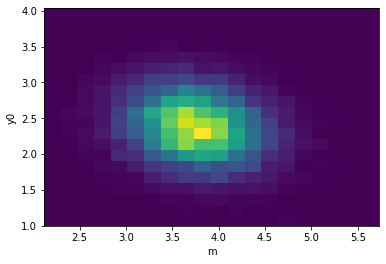

In [16]:
plt.hist2d(y0_m_dat[:, 0], y0_m_dat[:, 1], bins = 20)
plt.xlabel('m')
plt.ylabel('y0')
plt.show()

Here the correlation between the slope and the intercept is still negative but its around halh of the previous case. Leading a spread in the frequency distribution.

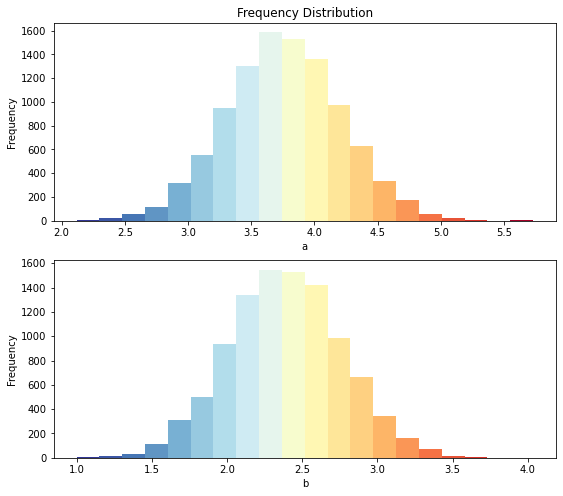

In [17]:
# Create a plot environment
fig = plt.figure(figsize=(9,8))
cm = plt.cm.get_cmap('RdYlBu_r')
gs = GridSpec(2,1)
# a frequency histogram
ax1 = fig.add_subplot(gs[0,0])
n, bins, patches = ax1.hist(y0_m_dat[:, 0], bins = 20)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
ax1.set_title('Frequency Distribution')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('a')
    
# b frequency histogram
ax2 = fig.add_subplot(gs[1,0])
n, bins, patches = ax2.hist(y0_m_dat[:, 1], bins = 20)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
ax2.set_ylabel('Frequency')
ax2.set_xlabel('b')
plt.show() 

#### Compare your value of y0 with y^ 

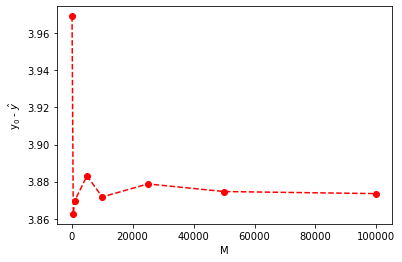

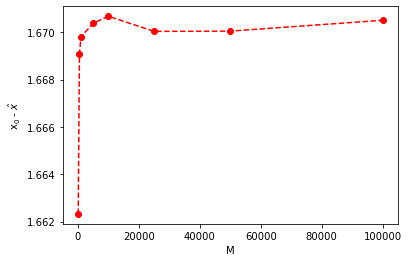

In [18]:
Ms = [100,500, 1000, 5000, 10000,  25000, 50000, 100000]
y0s = []
x0s = []
for k in Ms:
    x_hat, y_hat = [], []
    for i in range(k):
        x_d , y_d = [] , []
        for j in range(len(x)):
            # random.randn produce random numbers with Gaussian distribution
            x_d.append(x[j] + sx[j]*np.random.randn())
            y_d.append(y[j] + sy[j]*np.random.randn())
        # Calculate the slope and interception of each resampling dataset.
        y0_b, m_b = slope_inter2(x_d, sx, y_d, sy)
        y_hat.append(np.abs(y0_b - weighted_av(y_d, sy)))
        x_hat.append(np.abs(np.mean(x_d) - weighted_av(x_d, sx)))
    y0s.append( np.mean(y_hat))
    x0s.append( np.mean(x_hat))
plt.plot(Ms, y0s, "or--")
plt.xlabel('M')
plt.ylabel('y$_0$ - $\hat{y}$')
plt.show()

plt.plot(Ms, x0s, "or--")
plt.xlabel('M')
plt.ylabel('x$_0$ - $\hat{x}$')
plt.show()